# 供给与需求导论

## 概述

本讲座涉及均衡价格和数量的一些模型，这是基础微观经济学的核心主题之一。

在整个讲座中，我们将重点关注只有一种商品和一个价格的模型。

```{seealso}
在{doc}`后续讲座 <supply_demand_multiple_goods>`中，我们将研究涉及多种商品的情况。
```
### 为什么这个模型很重要？

在15、16、17和18世纪，重商主义思想在大多数欧洲国家的统治者中占据主导地位。

出口被认为是好的，因为它带来了金银（黄金流入国内）。

进口被认为是不好的，因为需要用金银来支付（黄金流出）。

这种[零和](https://baike.baidu.com/item/%E9%9B%B6%E5%92%8C%E5%8D%9A%E5%BC%88/3562463)经济观最终被古典经济学家如[亚当·斯密](https://baike.baidu.com/item/%E4%BA%9A%E5%BD%93%C2%B7%E6%96%AF%E5%AF%86/972521?fromModule=lemma_search-box)和[大卫·李嘉图](https://baike.baidu.com/item/%E5%A4%A7%E5%8D%AB%C2%B7%E6%9D%8E%E5%98%89%E5%9B%BE?fromModule=lemma_search-box)的工作推翻，他们展示了如何通过放开国内和国际贸易来提高福利。

这一观点在经济学中有许多不同的表达方式。

本讲座讨论了其中最简单的一种：价格的自由调整如何能在单一商品市场中最大化社会福利的衡量标准。

### 主题和函数库

在本讲座中，我们将遇到的关键基础概念包括：

* 反需求曲线
* 反供给曲线
* 消费者剩余
* 生产者剩余
* 积分
* 社会福利作为消费者和生产者剩余的总和
* 均衡数量与社会福利最优之间的关系

在我们的讲解中，我们将导入以下Python库。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

import matplotlib as mpl
FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

在我们研究供给和需求模型之前，了解一些关于（a）消费者和生产者剩余以及（b）积分的背景知识会很有帮助。

（如果你对这两个内容都很熟悉，可以跳到{ref}`下一节 <integration>`。）

### 一个离散的例子

关于消费者剩余，假设我们有一种商品和10个消费者。

这10个消费者有不同的偏好；尤其是他们愿意为一单位商品支付的金额各不相同。

假设这10个消费者的支付意愿如下：

| 消费者 | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 |
|--------|----|----|----|----|----|----|----|----|----|----|
| 支付意愿 | 98 | 72 | 41 | 38 | 29 | 21 | 17 | 12 | 11 | 10 |

（我们按支付意愿从高到低排列了消费者。）

如果 $p$ 是商品的价格，$w_i$ 是消费者 $i$ 愿意支付的金额，那么当 $w_i \geq p$ 时，$i$ 会购买。

```{note}
如果 $p=w_i$，消费者对购买与否没有区别；我们假设他们会选择购买。
```
第 $i$ 个消费者的**消费者剩余**是 $\max\{w_i - p, 0\}$

* 如果 $w_i \geq p$，那么消费者购买并获得剩余 $w_i - p$
* 如果 $w_i < p$，那么消费者不购买并获得剩余 $0$

例如，如果价格是 $p=40$，那么消费者1获得的剩余是 $98-40=58$。

下面的柱状图显示了当 $p=25$ 时每个消费者的剩余。

每个柱 $i$ 的总高度是消费者 $i$ 的支付意愿。

其中橙色部分显示了消费者剩余。

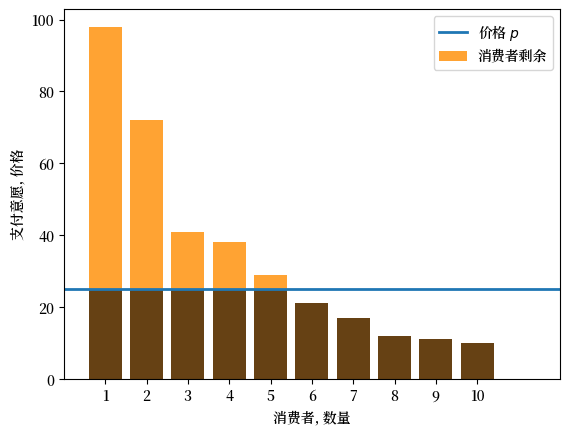

In [2]:
fig, ax = plt.subplots()
consumers = range(1, 11) # 消费者 1,..., 10
# 每个消费者的支付意愿
wtp = (98, 72, 41, 38, 29, 21, 17, 12, 11, 10)
price = 25
ax.bar(consumers, wtp, label="消费者剩余", color="darkorange", alpha=0.8)
ax.plot((0, 12), (price, price), lw=2, label="价格 $p$")
ax.bar(consumers, [min(w, price) for w in wtp], color="black", alpha=0.6)
ax.set_xlim(0, 12)
ax.set_xticks(consumers)
ax.set_ylabel("支付意愿, 价格")
ax.set_xlabel("消费者, 数量")
ax.legend()
plt.show()

这个市场的总消费者剩余是
$$ 
\sum_{i=1}^{10} \max\{w_i - p, 0\}
= \sum_{w_i \geq p} (w_i - p)
$$

由于消费者 $i$ 的消费者剩余 $\max\{w_i-p,0\}$ 是衡量其贸易收益的一种方式（也就是说商品的价值超过消费者必须支付的金额的程度），将总消费者剩余视为衡量消费者福利的一种方法是合理的。

稍后我们将进一步探讨这个想法，考虑不同的价格如何导致消费者和生产者的不同福利结果。

### 关于数量的说明

注意，在图中，横轴标记为"消费者，数量"。

我们在这里添加了"数量"，因为我们可以从这个轴上读取售出的单位数量，暂时假设有卖家愿意以当前市场价格 $p$ 出售消费者需求的任意数量。

在这个例子中，消费者1到5购买，售出的数量是5。

接下来，我们将去掉卖家会以给定价格提供任意数量的假设，并研究这将如何改变这个结果。

### 连续近似

假设有"非常多"的消费者通常很方便，这样支付意愿就变成了一条连续曲线。

和之前一样，纵轴衡量支付意愿，而横轴衡量数量。

这种曲线被称为**反向需求曲线**。

下面提供了一个例子，显示了反向需求曲线和一个设定价格。

反向需求曲线由以下公式给出：

$$
p = 100 e^{-q} 
$$

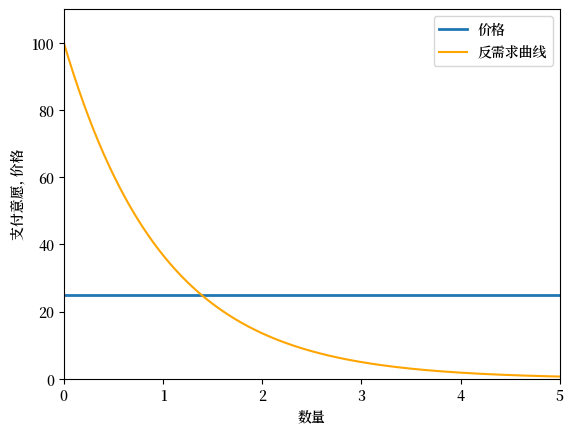

In [3]:
def inverse_demand(q):
    return 100 * np.exp(- q)

# 建立 q 的取值空间来绘制函数
q_min, q_max = 0, 5
q_grid = np.linspace(q_min, q_max, 1000)

# 绘制反需求曲线
fig, ax = plt.subplots()
ax.plot((q_min, q_max), (price, price), lw=2, label="价格")
ax.plot(q_grid, inverse_demand(q_grid), 
        color="orange", label="反需求曲线")
ax.set_ylabel("支付意愿, 价格")
ax.set_xlabel("数量")
ax.set_xlim(q_min, q_max)
ax.set_ylim(0, 110)
ax.legend()
plt.show()

通过类比离散情况进行推理，反向需求曲线下方且在价格上方的面积之和被称为**消费者剩余**，它是衡量消费者交易总收益的一个指标。

消费者剩余在下图中以阴影表示。

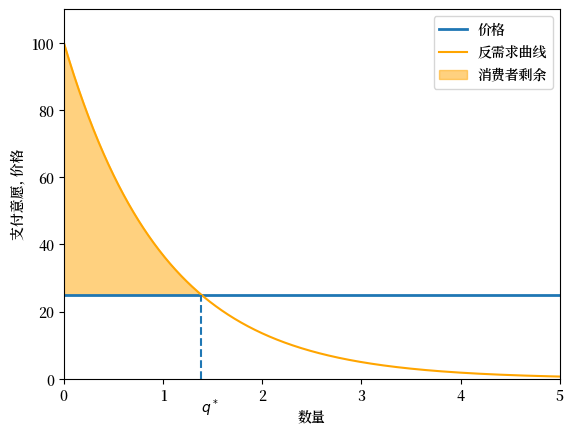

In [4]:
# 求解支付意愿与价格相等时的 q 值
q_star = np.log(100) - np.log(price)

fig, ax = plt.subplots()
ax.plot((q_min, q_max), (price, price), lw=2, label="价格")
ax.plot(q_grid, inverse_demand(q_grid), 
        color="orange", label="反需求曲线")
small_grid = np.linspace(0, q_star, 500)
ax.fill_between(small_grid, np.full(len(small_grid), price),
                inverse_demand(small_grid), color="orange",
                alpha=0.5, label="消费者剩余")
ax.vlines(q_star, 0, price, ls="--")
ax.set_ylabel("支付意愿, 价格")
ax.set_xlabel("数量")
ax.set_xlim(q_min, q_max)
ax.set_ylim(0, 110)
ax.text(q_star, -10, "$q^*$")
ax.legend()
plt.show()

其中$q^*$的值是反需求曲线与价格相交的点。

## 生产者剩余

在讨论了需求之后，让我们现在转向市场的供给方。

### 离散情况

下图显示了一组编号从 1 到 10 的生产者愿意出售一单位该商品的价格

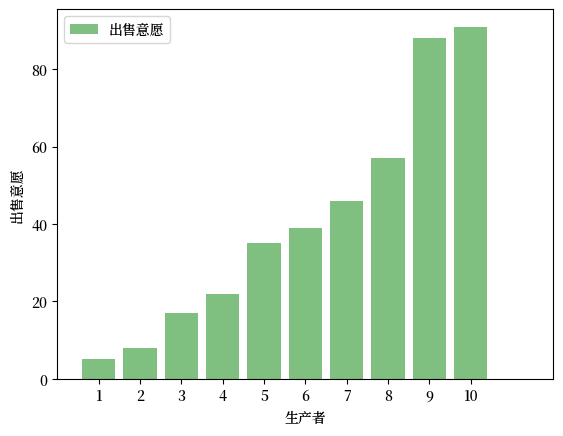

In [5]:
fig, ax = plt.subplots()
producers = range(1, 11) # 生产者 1,..., 10
# 每个生产者的出售意愿
wts = (5, 8, 17, 22, 35, 39, 46, 57, 88, 91)
price = 25
ax.bar(producers, wts, label="出售意愿", color="green", alpha=0.5)
ax.set_xlim(0, 12)
ax.set_xticks(producers)
ax.set_ylabel("出售意愿")
ax.set_xlabel("生产者")
ax.legend()
plt.show()

让 $v_i$ 为生产者 $i$ 愿意出售商品的价格。

当价格为 $p$ 时，生产者 $i$ 的生产者剩余为 $\max\{p - v_i, 0\}$。

例如，一个愿意以 10 美元价格出售并且以 20 美元价格售出的生产者可以获得 10 美元的剩余。

总生产者剩余由以下公式给出：

$$
\sum_{i=1}^{10} \max\{p - v_i, 0\}
= \sum_{p \geq v_i} (p - v_i)
$$

与消费者的情况一样，将生产者的出售意愿近似为连续曲线对分析有帮助。

这条曲线被称为**反供给曲线**。

我们在下面展示了一个例子，其中反供给曲线为：

$$
p = 2 q^2
$$

阴影部分是这个连续模型中的总生产者剩余。

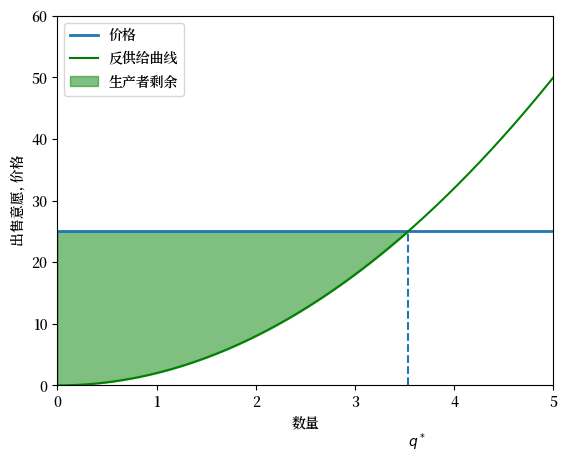

In [6]:
def inverse_supply(q):
    return 2 * q**2

# 求解出售意愿与价格相等时的 q 值
q_star = (price / 2)**(1/2)

# 绘制反供给曲线
fig, ax = plt.subplots()
ax.plot((q_min, q_max), (price, price), lw=2, label="价格")
ax.plot(q_grid, inverse_supply(q_grid), 
        color="green", label="反供给曲线")
small_grid = np.linspace(0, q_star, 500)
ax.fill_between(small_grid, inverse_supply(small_grid), 
                np.full(len(small_grid), price), 
                color="green",
                alpha=0.5, label="生产者剩余")
ax.vlines(q_star, 0, price, ls="--")
ax.set_ylabel("出售意愿, 价格")
ax.set_xlabel("数量")
ax.set_xlim(q_min, q_max)
ax.set_ylim(0, 60)
ax.text(q_star, -10, "$q^*$")
ax.legend()
plt.show()

(integration)=
## 积分

在连续情况下，我们如何计算消费者和生产者剩余呢？

简短的答案是：通过使用[积分](https://baike.baidu.com/item/%E7%A7%AF%E5%88%86/5749068)。

一些读者可能已经熟悉积分的基础知识。

对于那些不熟悉的读者，这里是一个简短的介绍。

一般来说，对于函数 $f$，$f$ 在区间 $[a, b]$ 上的**积分**是 $f$ 在 $a$ 和 $b$ 之间的曲线下面积。

这个值写作 $\int_a^b f(x) \mathrm{d} x$，下图展示了当 $f(x) = \cos(x/2) + 1$ 时的情况。

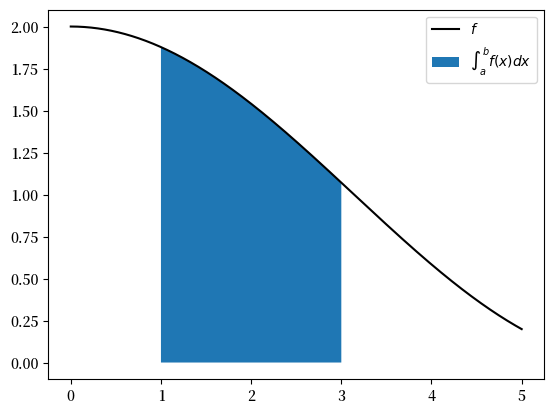

In [7]:
def f(x):
    return np.cos(x/2) + 1

xmin, xmax = 0, 5
a, b = 1, 3
x_grid = np.linspace(xmin, xmax, 1000)
ab_grid = np.linspace(a, b, 400)

fig, ax = plt.subplots()
ax.plot(x_grid, f(x_grid), label="$f$", color="k")
ax.fill_between(ab_grid, [0] * len(ab_grid), f(ab_grid), 
                label=r"$\int_a^b f(x) dx$")
ax.legend()
plt.show()

计算积分有许多规则，不同的 $f$ 选择适用不同的规则。

这些规则中的许多与数学中最美丽和最强大的结果之一有关：[微积分基本定理](https://baike.baidu.com/item/%E7%89%9B%E9%A1%BF-%E8%8E%B1%E5%B8%83%E5%B0%BC%E8%8C%A8%E5%85%AC%E5%BC%8F?fromtitle=%E5%BE%AE%E7%A7%AF%E5%88%86%E5%9F%BA%E6%9C%AC%E5%AE%9A%E7%90%86&fromid=10350012&fromModule=lemma_search-box)。

我们不会在这里试图涵盖这些思想，部分原因是因为这个主题太大，部分原因是对于本讲座，你只需要知道下面陈述的一条定理。

如果 $f(x) = c + \mathrm{d} x$，那么

$$ 
\int_a^b f(x) \mathrm{d} x = c (b - a) + \frac{d}{2}(b^2 - a^2) 
$$

事实上，这个规则如此简单，以至于可以通过基本几何计算得出——你可以试着绘制 $f$ 的图形并计算 $a$ 和 $b$ 之间曲线下的面积。

在接下来的内容中，我们将反复使用这个定理。

## 供给和需求

现在让我们把供给和需求放在一起。

这将引导我们到非常重要的市场均衡概念，并从那里讨论均衡和福利。

在大部分的讨论中，我们假设反需求曲线和反供给曲线是数量的**仿射**函数。

```{note}
"仿射"意味着"线性加上一个常数"，[这里](https://math.stackexchange.com/questions/275310/what-is-the-difference-between-linear-and-affine-function)有一个很好的讨论。
```

在我们研究{doc}`后续讲座 <supply_demand_multiple_goods>`中的多消费品模型时，我们也将假设仿射的反供给和反需求函数。

这样做是为了简化说明，并且使我们能够仅使用线性代数的几个工具，即矩阵乘法和矩阵求逆。

我们研究一个单一商品市场，买家和卖家以价格 $p$ 交换数量 $q$。

数量 $q$ 和价格 $p$ 都是标量。

我们假设该商品的反需求曲线和反供给曲线为：

$$
p = d_0 - d_1 q, \quad d_0, d_1 > 0
$$

$$
p = s_0 + s_1 q , \quad s_0, s_1 > 0
$$

我们称它们为反需求曲线和反供给曲线，因为价格在等式的左侧，而不是直接像需求或供给函数那样在右侧。

我们可以使用 [namedtuple](https://docs.python.org/3/library/collections.html#collections.namedtuple) 来存储我们单一商品市场的参数。

In [8]:
Market = namedtuple('Market', ['d_0', # 需求截距
                               'd_1', # 需求斜率
                               's_0', # 供给截距
                               's_1'] # 供给斜率
                   )

下面的函数创建了一个具有默认值的 Market namedtuple。

In [9]:
def create_market(d_0=1.0, d_1=0.6, s_0=0.1, s_1=0.4):
    return Market(d_0=d_0, d_1=d_1, s_0=s_0, s_1=s_1)

这个 `market`可以用来建立 `inverse_demand` 和 `inverse_supply` 函数。

In [10]:
def inverse_demand(q, model):
    return model.d_0 - model.d_1 * q

def inverse_supply(q, model):
    return model.s_0 + model.s_1 * q

下面是这两个函数使用`market`参数的图像。

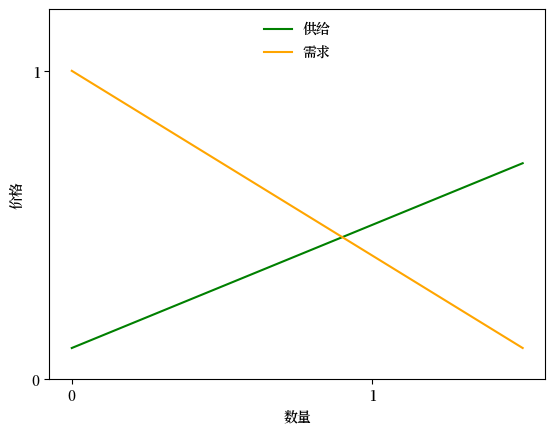

In [11]:
market = create_market()

grid_min, grid_max, grid_size = 0, 1.5, 200
q_grid = np.linspace(grid_min, grid_max, grid_size)
supply_curve = inverse_supply(q_grid, market)
demand_curve = inverse_demand(q_grid, market)

fig, ax = plt.subplots()
ax.plot(q_grid, supply_curve, label='供给', color='green')
ax.plot(q_grid, demand_curve, label='需求', color='orange')
ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((0, 1))
ax.set_yticks((0, 1))
ax.set_xlabel('数量')
ax.set_ylabel('价格')
plt.show()

在上图中，供给曲线和需求曲线的交点出现**均衡**价格-数量对。

### 消费者剩余

给定数量 $q$，设 $p := d_0 - d_1 q$ 为反需求曲线上对应的价格。

我们将**消费者剩余** $S_c(q)$ 定义为反需求曲线下（且在价格线之上）的面积减去 $p q$:

$$
S_c(q) := 
\int_0^{q} (d_0 - d_1 x) \mathrm{d} x - p q 
$$ (eq:cstm_spls)

下图说明了这一点

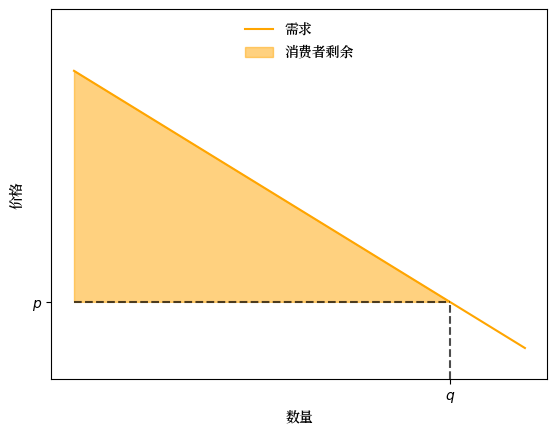

In [12]:
q = 1.25
p = inverse_demand(q, market)
ps = np.ones_like(q_grid) * p

fig, ax = plt.subplots()
ax.plot(q_grid, demand_curve, label='需求', color='orange')
ax.fill_between(q_grid[q_grid <= q],
                demand_curve[q_grid <= q],
                ps[q_grid <= q],
                label='消费者剩余',
                color="orange", 
                alpha=0.5)
ax.vlines(q, 0, p, linestyle="dashed", color='black', alpha=0.7)
ax.hlines(p, 0, q, linestyle="dashed", color='black', alpha=0.7)

ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((q,))
ax.set_xticklabels(("$q$",))
ax.set_yticks((p,))
ax.set_yticklabels(("$p$",))
ax.set_xlabel('数量')
ax.set_ylabel('价格')
plt.show()

消费者剩余提供了在数量 $q$ 时总消费者福利的衡量。

这个概念是基于反向需求曲线 $d_0 - d_1 q$ 显示了消费者在给定数量 $q$ 时对额外增加一单位商品的支付意愿。

支付意愿与实际价格之间的差异就是消费者剩余。

当总购买数量为 $q$ 且购买价格为 $p$ 时，$S_c(q)$ 值是这些剩余的"总和"（即积分）。

计算消费者剩余定义中的积分 {eq}`eq:cstm_spls` 得到

$$
S_c(q) 
= d_0 q - \frac{1}{2} d_1 q^2 - p q
$$

### 生产者剩余

给定数量 $q$，设 $p := s_0 + s_1 q$ 为反供给曲线上对应的价格。

我们将**生产者剩余**定义为 $p q$ 减去反供给曲线上的面积

$$
S_p(q) 
:= p q - \int_0^q (s_0 + s_1 x) \mathrm{d} x 
$$ (eq:pdcr_spls)

下图对此进行了说明

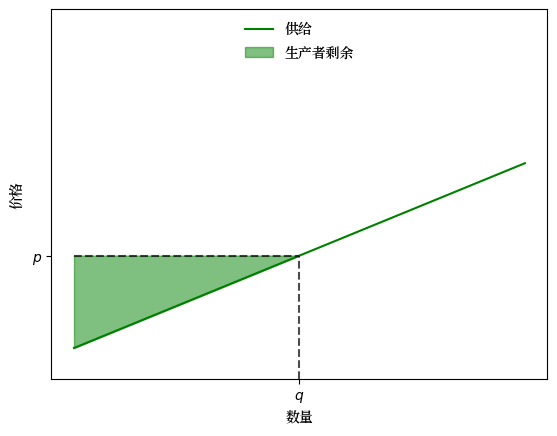

In [13]:
q = 0.75
p = inverse_supply(q, market)
ps = np.ones_like(q_grid) * p

fig, ax = plt.subplots()
ax.plot(q_grid, supply_curve, label='供给', color='green')
ax.fill_between(q_grid[q_grid <= q],
                supply_curve[q_grid <= q],
                ps[q_grid <= q],
                label='生产者剩余',
                color="green",
                alpha=0.5)
ax.vlines(q, 0, p, linestyle="dashed", color='black', alpha=0.7)
ax.hlines(p, 0, q, linestyle="dashed", color='black', alpha=0.7)

ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((q,))
ax.set_xticklabels(("$q$",))
ax.set_yticks((p,))
ax.set_yticklabels(("$p$",))
ax.set_xlabel('数量')
ax.set_ylabel('价格')
plt.show()

生产者剩余衡量在数量 $q$ 时的总生产者福利。

这个概念与消费者剩余类似。

反供给曲线 $s_0 + s_1 q$ 显示了在给定数量 $q$ 时，生产者愿意出售的价格。

愿意出售的价格与实际价格之间的差异就是生产者剩余。

$S_p(q)$ 值是这些剩余的积分。

计算生产者剩余定义中的积分 {eq}`eq:pdcr_spls` 得到

$$
S_p(q) = pq - s_0 q -  \frac{1}{2} s_1 q^2
$$

### 社会福利

经济学家有时通过一个**福利准则**来衡量社会福利，假设消费者和生产者支付相同的价格，该准则等于消费者剩余加上生产者剩余：

$$
W(q)
= \int_0^q (d_0 - d_1 x) dx - \int_0^q (s_0 + s_1 x) \mathrm{d} x  
$$

计算积分得到

$$
W(q) = (d_0 - s_0) q -  \frac{1}{2} (d_1 + s_1) q^2
$$

以下是一个Python函数，用于在给定数量 $q$ 和固定参数集下评估这个社会福利。

In [14]:
def W(q, market):
    # 计算福利
    return (market.d_0 - market.s_0) * q - 0.5 * (market.d_1 + market.s_1) * q**2

下图绘制了福利以 $q$ 为自变量的函数。

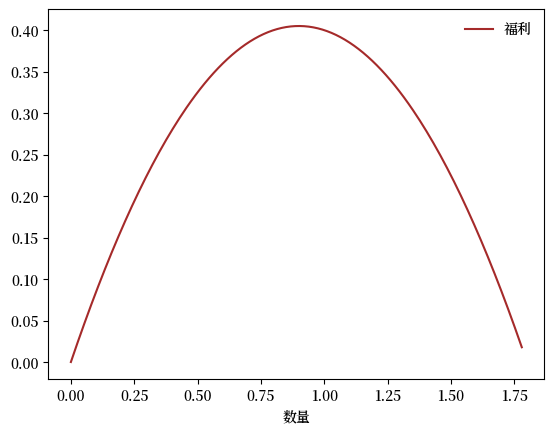

In [15]:
q_vals = np.linspace(0, 1.78, 200)
fig, ax = plt.subplots()
ax.plot(q_vals, W(q_vals, market), label='福利', color='brown')
ax.legend(frameon=False)
ax.set_xlabel('数量')
plt.show()

现在让我们给社会规划者一个最大化社会福利的任务。

为了计算使福利准则最大化的数量，我们对 $W$ 关于 $q$ 求导，然后将导数设为零。

$$
\frac{\mathrm{d} W(q)}{\mathrm{d} q} = d_0 - s_0 - (d_1 + s_1) q  = 0
$$

解出 $q$ 得到

$$
q = \frac{ d_0 - s_0}{s_1 + d_1}
$$ (eq:old1)

让我们记住方程 {eq}`eq:old1` 给出的数量 $q$，这是社会规划者为最大化消费者剩余加生产者剩余之和而选择的数量。

我们将把它与在竞争均衡中出现的、使供给等于需求的数量进行比较。

### 竞争均衡

我们可以通过使需求价格等于供给价格来达到与使供给数量等于需求数量相同的效果：

$$
p =  d_0 - d_1 q = s_0 + s_1 q 
$$

如果我们解上面这行中第二个等式定义的方程，得到 $q$，我们得到

$$
q = \frac{ d_0 - s_0}{s_1 + d_1}
$$ (eq:equilib_q)

这就是竞争均衡数量。

注意，均衡数量等于方程 {eq}`eq:old1` 给出的相同的 $q$。

方程 {eq}`eq:old1` 确定的数量使供给等于需求，这带来了一个**关键发现**：

* 竞争均衡数量最大化了我们的福利准则

这是[福利经济学第一基本定理](https://baike.baidu.com/item/%E7%A6%8F%E5%88%A9%E7%BB%8F%E6%B5%8E%E5%AD%A6%E7%AC%AC%E4%B8%80%E5%AE%9A%E7%90%86?fromModule=lemma_search-box)的一个版本。
它还带来了一个有用的**竞争均衡计算策略**：

* 在为最优数量解决福利问题后，我们可以从竞争均衡数量下的供给价格或需求价格中计算出竞争均衡价格

## 推广

在{doc}`后面的讲座 <supply_demand_multiple_goods>`中，我们将从其他对象推导出上述需求和供给曲线的推广。

我们的推广将把前面对单一商品市场的分析扩展到 $n$ 种商品的 $n$ 个同时市场的分析。

此外

* 我们将从消费者问题中推导出**需求曲线**，该问题在**预算约束**下最大化**效用函数**。
* 我们将从生产者问题中推导出**供给曲线**，该生产者是价格接受者，最大化其利润减去由**成本函数**描述的总成本。

## 练习

现在假设反向需求和反供给曲线被修改为以下形式

$$
p = i_d(q) := d_0 - d_1 q^{0.6} 
$$

$$
p = i_s(q) := s_0 + s_1 q^{1.8} 
$$

和以前一样，所有参数都是正的。

```{exercise}
:label: isd_ex1

使用与之前相同的 `Market` 命名元组来保存参数值，但创建新的 `inverse_demand` 和 `inverse_supply` 函数以匹配这些新定义。

然后绘制反向需求曲线 $i_d$ 和反向供给曲线 $i_s$。

```

```{solution-start} isd_ex1
:class: dropdown
```
让我们按照上面定义的方式更新 `inverse_demand` 和 `inverse_supply` 函数。

In [16]:
def inverse_demand(q, model):
    return model.d_0 - model.d_1 * q**0.6

def inverse_supply(q, model):
    return model.s_0 + model.s_1 * q**1.8

下图绘制了反需求和反供给曲线。

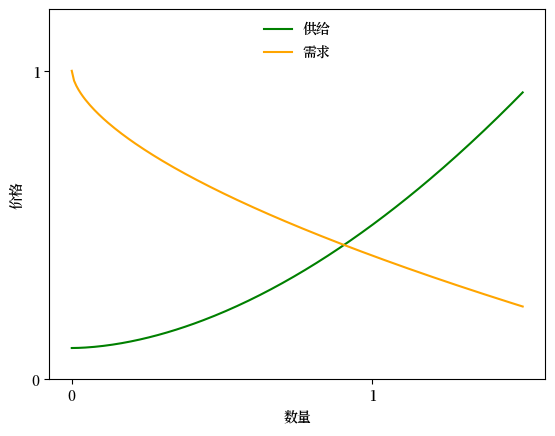

In [17]:
grid_min, grid_max, grid_size = 0, 1.5, 200
q_grid = np.linspace(grid_min, grid_max, grid_size)
market = create_market()
supply_curve = inverse_supply(q_grid, market)
demand_curve = inverse_demand(q_grid, market)

fig, ax = plt.subplots()
ax.plot(q_grid, supply_curve, label='供给', color='green')
ax.plot(q_grid, demand_curve, label='需求', color='orange')
ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((0, 1))
ax.set_yticks((0, 1))
ax.set_xlabel('数量')
ax.set_ylabel('价格')
plt.show()

```{solution-end}
```
```{exercise}
:label: isd_ex2

如前所述，在数量 $q$ 时的消费者剩余是反需求曲线下的面积减去价格乘以数量：

$$
S_c(q) = \int_0^{q} i_d(x) dx - p q 
$$

这里 $p$ 设为 $i_d(q)$。

生产者剩余是价格乘以数量减去向供给曲线下的面积：

$$
S_p(q) 
= p q - \int_0^q i_s(x) \mathrm{d} x 
$$

这里 $p$ 设为 $i_s(q)$。

社会福利是消费者剩余和生产者剩余的总和，假设买方和卖方的价格相同：

$$
W(q)
= \int_0^q i_d(x) dx - \int_0^q i_s(x) \mathrm{d} x  
$$

求解积分并编写一个函数，在给定的 $q$ 处数值计算福利。
绘制福利作为 $q$ 的函数的图表。
```

```{solution-start} isd_ex2
:class: dropdown
```
求解积分得到：

$$
W(q) 
= d_0 q - \frac{d_1 q^{1.6}}{1.6}
    - \left( s_0 q + \frac{s_1 q^{2.8}}{2.8} \right)
$$

以下是一个计算这个值的 Python 函数：

In [18]:
def W(q, market):
    # 计算福利
    S_c = market.d_0 * q - market.d_1 * q**1.6 / 1.6
    S_p = market.s_0 * q + market.s_1 * q**2.8 / 2.8
    return S_c - S_p

下图绘制了福利作为 $q$ 的函数。

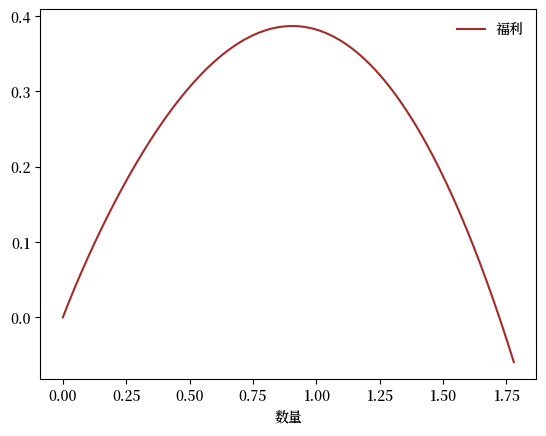

In [19]:
fig, ax = plt.subplots()
ax.plot(q_vals, W(q_vals, market), label='福利', color='brown')
ax.legend(frameon=False)
ax.set_xlabel('数量')
plt.show()

```{solution-end}
```

````{exercise}
:label: isd_ex3

由于非线性性，新的福利函数不容易用手算来求解最大化。

相反，我们可以使用 `scipy.optimize.minimize_scalar` 来求解。

```{seealso}
我们的 [SciPy](https://python-programming.quantecon.org/scipy.html) 讲座中有一个关于[优化](https://python-programming.quantecon.org/scipy.html#optimization)的章节，这里可以了解更多有用资源。
```

````

```{solution-start} isd_ex3
:class: dropdown
```

In [20]:
from scipy.optimize import minimize_scalar

def objective(q):
    return -W(q, market)

result = minimize_scalar(objective, bounds=(0, 10))
print(result.message)

Solution found.


In [21]:
maximizing_q = result.x
print(f"{maximizing_q: .5f}")

 0.90564


```{solution-end}
```

````{exercise}
:label: isd_ex4

现在通过找到使供给和需求相等的价格来计算均衡数量。

我们可以通过寻找超额需求函数的根来数值计算这个价格：

$$
e_d(q) := i_d(q) - i_s(q) 
$$

我们可以使用 `scipy.optimize.newton` 来计算根。

```{seealso}
我们的 [SciPy](https://python-programming.quantecon.org/scipy.html) 讲座中有一个关于[根和不动点](https://python-programming.quantecon.org/scipy.html#roots-and-fixed-points)的章节，这是一个了解更多信息的有用资源。
```

使用接近 1.0 的初始猜测值来初始化 `newton`。（相似的初始条件将给出相同的结果。）

我们发现均衡价格与福利最大化价格一致，这符合福利经济学第一基本定理。

````

```{solution-start} isd_ex4
:class: dropdown
```

In [22]:
from scipy.optimize import newton

def excess_demand(q):
    return inverse_demand(q, market) - inverse_supply(q, market)

equilibrium_q = newton(excess_demand, 0.99)
print(f"{equilibrium_q: .5f}")

 0.90564


```{solution-end}
```